# Atividade 02 - Redes Neurais Rasas

- Usar a função sklearn.datasets.make_classification do scikit learn.
- Fazer datasets binários diferentes tamanhos e distribuições.
- Comparar algumas arquiteturas rasas (ex.: implementar um perceptron e comparar com o perceptron do scikit learn)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# CARREGAMENTO DOS DADOS DOS DATASETS
# Entrada: são 20 features numéricas
# Saída: uma variável binária (1 ou 0)

X1, y1 = make_classification(random_state=42)
X2, y2 = make_classification(random_state=1)
X3, y3 = make_classification(random_state=29)
X4, y4 = make_classification(random_state=1985)

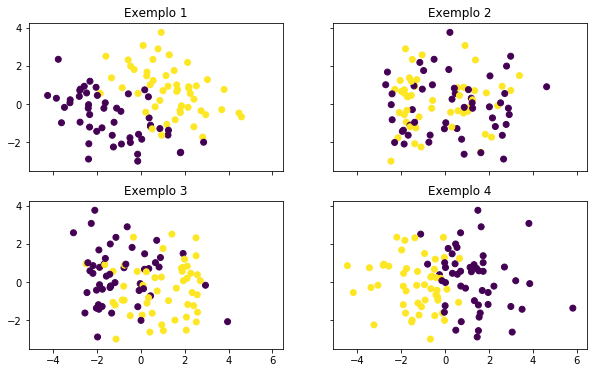

In [13]:
# VISUALIZAÇÃO EM 2D COM PCA (Principal Component Analysis)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

# Monta uma gráfico com 4 posições (2 x 2)
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)

# Seta algura e largura do gráfico
fig.set_figheight(6)
fig.set_figwidth(10)

# Plota os dados
axs[0, 0].scatter(pca.fit_transform(X1)[:,0], pca.fit_transform(X1)[:,1], c=y1)
axs[0, 0].set_title('Exemplo 1')

axs[0, 1].scatter(pca.fit_transform(X2)[:,0], pca.fit_transform(X1)[:,1], c=y2)
axs[0, 1].set_title('Exemplo 2')

axs[1, 0].scatter(pca.fit_transform(X3)[:,0], pca.fit_transform(X1)[:,1], c=y3)
axs[1, 0].set_title('Exemplo 3')

axs[1, 1].scatter(pca.fit_transform(X4)[:,0], pca.fit_transform(X1)[:,1], c=y4)
axs[1, 1].set_title('Exemplo 4')

plt.show()

In [4]:
# CLASSE Perceptron do Scikit-Learn

from sklearn.linear_model import Perceptron

In [5]:
# CLASSE IfesPerceptron (Atividade 01)

from sklearn.base import BaseEstimator, ClassifierMixin

class IfesPerceptron(BaseEstimator, ClassifierMixin):
    "Implementa uma rede neural do tipo Perceptron com um neurônio"
    def __init__(self):
        pass

    def funcao_ativacao(self, XWb):
        "A função de ativação é a função degrau (também chamada step ou heaviside)"
        # retorna 0 se x < 0
        # retorna 1 se x >= 0
        return np.heaviside(XWb, 1)
        
    def fit(self, X, y=None):
        "Treina usando uma instancia de cada vez"
        self.numero_instancias = X.shape[0]
        self.numero_features = X.shape[1]
        
        # Taxa de aprendizado
        self.taxa_aprendizado = 0.1
        
        # Matrizes do pesos W
        # Conforme livro do Tariq Rashid, é boa prática iniciar os pesos de forma randômica
        # entre +- 1 / raizquadrada(nos_entrada)
        self.W = np.random.normal(0.0, pow(self.numero_features, -0.5), (1, self.numero_features))
        #print(f'Matriz W Inicial ({self.W.shape}): {self.W}')
        
        # Vetor de peso bias b (inicializada sempre como 1)
        self.b = [1]
        #print(f'Vetor b: {self.b}')
        
        for instancia in range(self.numero_instancias):
            XWb = np.dot(X[instancia], self.W.T) + self.b
            h_WbX = self.funcao_ativacao(XWb)
            #print(f'XW+b: {XWb}')
            #print(f'Resultado da função de ativação: {h_WbX}')
            
            # Atualização dos pesos de W
            self.W += self.taxa_aprendizado * (y[instancia] - h_WbX) * X[instancia]
            #print(f'Matriz W após instância {instancia}: {self.W}')

    def predict(self, X, y=None):
        "Prediz todas as respostas de X_test usando a matriz de pesos treinada"
        XWb = np.dot(X, self.W.T)
        hWbX = self.funcao_ativacao(XWb)
        return hWbX

Tentei também fazer um "Perceptron" usando o Tensorflow porém sem sucesso (não encontrei ativação tipo degrau):

In [6]:
# Classe TensorFlowPerceptron (encapsulado dentro da classe base do scikit-learn) conforme dica do Prof. Boltd
# %tensorflow_version 2.x
import tensorflow as tf
from sklearn.base import BaseEstimator, ClassifierMixin

class TensorflowPerceptron(BaseEstimator, ClassifierMixin):
    """ Classe customizada com base no sklearn """
    def __init__(self):
        pass
  
    def fit(self, X_train, y_train):
        """ Estrutura de rede de uma camada com ativação softmax """
        nFeatures = X_train.shape[1]
        nClasses = np.unique(y_train).shape[0]
        nNeuronios = 1

        self.model = tf.keras.models.Sequential()    
        self.model.add(tf.keras.layers.Dense(nNeuronios,input_dim=nFeatures,activation='sigmoid'))

        self.model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])       

        self.model.fit(X_train, y_train, epochs=10, verbose=0)

    def predict(self, X_test):
        "Chama o predict do modelo"
        predictions = self.model.predict(X_test)
        #print(predictions)
        return np.argmax(predictions,axis=1)

In [7]:
# Classe PerformanceEvaluator (da disciplina de Reconhecimento de Padrões)

class PerformanceEvaluator():
    """ Classe avaliadora de performance dos classificadores (com base no exemplo do Prof. Boldt)"""
    def __init__(self, clfs, X, y):
        self.clfs = clfs
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.33, random_state=42)
        
    def treinar(self):
        print("TREINAMENTO- - - - - - - - - - - - - - - - - - -")
        print(f'{"":>30}  Acurácia')
        for name,clf in self.clfs:
            clf.fit(self.X_train,self.y_train)
            train_accuracy = clf.score(self.X_train,self.y_train)
            print(f'{name:>30}: {train_accuracy:.4f}')

    def testar(self):
        # Testa os classificadores em dados de teste (não vistos no treinamento)
        print("TESTE- - - - - - - - - - - - - - - - - - - - - -")
        for name,clf in self.clfs:
            test_accuracy = clf.score(self.X_test, self.y_test)
            print(f'{name:>30}: {test_accuracy:.4f}')

In [8]:
# TREINAMENTO E TESTE

clfs = [
    ('Ifes Perceptron', IfesPerceptron()),
    ('Sklearn Perceptron', Perceptron()),
    ('Tensorflow Perceptron', TensorflowPerceptron())
]

pe1 = PerformanceEvaluator(clfs, X1, y1)
pe2 = PerformanceEvaluator(clfs, X2, y2)
pe3 = PerformanceEvaluator(clfs, X3, y3)
pe4 = PerformanceEvaluator(clfs, X4, y4)

In [9]:
# Resutados do Exemplo 1
print('EXEMPLO 1')
pe1.treinar()
pe1.testar()

EXEMPLO 1
TREINAMENTO- - - - - - - - - - - - - - - - - - -
                                Acurácia
               Ifes Perceptron: 0.9851
            Sklearn Perceptron: 1.0000
         Tensorflow Perceptron: 0.4925
TESTE- - - - - - - - - - - - - - - - - - - - - -
               Ifes Perceptron: 0.7879
            Sklearn Perceptron: 0.9394
         Tensorflow Perceptron: 0.5152


In [10]:
# Resutados do Exemplo 2
print('EXEMPLO 1')
pe2.treinar()
pe2.testar()

EXEMPLO 1
TREINAMENTO- - - - - - - - - - - - - - - - - - -
                                Acurácia
               Ifes Perceptron: 0.8955
            Sklearn Perceptron: 1.0000
         Tensorflow Perceptron: 0.5075
TESTE- - - - - - - - - - - - - - - - - - - - - -
               Ifes Perceptron: 0.8788
            Sklearn Perceptron: 0.9697
         Tensorflow Perceptron: 0.5152


In [11]:
# Resutados do Exemplo 3
print('EXEMPLO 3')
pe3.treinar()
pe3.testar()

EXEMPLO 3
TREINAMENTO- - - - - - - - - - - - - - - - - - -
                                Acurácia
               Ifes Perceptron: 0.9403
            Sklearn Perceptron: 0.8955
         Tensorflow Perceptron: 0.5075
TESTE- - - - - - - - - - - - - - - - - - - - - -
               Ifes Perceptron: 0.9091
            Sklearn Perceptron: 0.6970
         Tensorflow Perceptron: 0.4848


In [12]:
# Resutados do Exemplo 4
print('EXEMPLO 4')
pe4.treinar()
pe4.testar()

EXEMPLO 4
TREINAMENTO- - - - - - - - - - - - - - - - - - -
                                Acurácia
               Ifes Perceptron: 0.9104
            Sklearn Perceptron: 1.0000
         Tensorflow Perceptron: 0.4776
TESTE- - - - - - - - - - - - - - - - - - - - - -
               Ifes Perceptron: 0.8788
            Sklearn Perceptron: 0.8485
         Tensorflow Perceptron: 0.5455


Os resultados para o Tensorflow de camada rasa possivelmente estão incorretos, mas mantive para mostrar a tentativa realizada.